In [9]:
# Load dataset
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

df = pd.read_csv('HeartDiseaseTrain-Test.csv')
print('\nShape:', df.shape)
df.head()


Shape: (1025, 14)


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [2]:
# EDA: info, dtypes, missing values and basic stats
display(df.info())
display(df.describe(include='all').T)
print('\nMissing values per column:')
display(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            1025 non-null   int64  
 1   sex                            1025 non-null   object 
 2   chest_pain_type                1025 non-null   object 
 3   resting_blood_pressure         1025 non-null   int64  
 4   cholestoral                    1025 non-null   int64  
 5   fasting_blood_sugar            1025 non-null   object 
 6   rest_ecg                       1025 non-null   object 
 7   Max_heart_rate                 1025 non-null   int64  
 8   exercise_induced_angina        1025 non-null   object 
 9   oldpeak                        1025 non-null   float64
 10  slope                          1025 non-null   object 
 11  vessels_colored_by_flourosopy  1025 non-null   object 
 12  thalassemia                    1025 non-null   o

None

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1025.0,NaN,NaN,NaN,54.434146,9.07229,29.0,48.0,56.0,61.0,77.0
sex,1025,2,Male,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chest_pain_type,1025,4,Typical angina,497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_blood_pressure,1025.0,NaN,NaN,NaN,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
cholestoral,1025.0,NaN,NaN,NaN,246.0,51.59251,126.0,211.0,240.0,275.0,564.0
fasting_blood_sugar,1025,2,Lower than 120 mg/ml,872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_ecg,1025,3,ST-T wave abnormality,513,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max_heart_rate,1025.0,NaN,NaN,NaN,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exercise_induced_angina,1025,2,No,680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldpeak,1025.0,NaN,NaN,NaN,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2



Missing values per column:


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [5]:
# Identify numerical and categorical columns
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print('Numerical columns:', num_cols)
print('Categorical columns:', cat_cols)

Numerical columns: ['age', 'resting_blood_pressure', 'cholestoral', 'Max_heart_rate', 'oldpeak', 'target']
Categorical columns: ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']


In [6]:
# Make a copy
data = df.copy()

# Detect target column
possible_targets = [c for c in data.columns if c.lower() in ('target','heartdisease','heart_disease','hd','condition','output')]
target_col = possible_targets[0] if possible_targets else None
print('Detected target column:', target_col)

if target_col is None:
    target_col = data.columns[-1]
    print('No standard target name detected - using last column as target:', target_col)

# Fill numeric with median and categorical with mode
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in data.columns if c not in num_cols]

for c in num_cols:
    median = data[c].median()
    if pd.isna(median):
        median = 0
    data[c] = data[c].fillna(median)

for c in cat_cols:
    mode = data[c].mode()
    if len(mode) > 0:
        data[c] = data[c].fillna(mode[0])
    else:
        data[c] = data[c].fillna('Unknown')

print('Missing values after imputation:')
display(data.isna().sum())

Detected target column: target
Missing values after imputation:


age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [7]:
# Exclude target from encoding
features = data.drop(columns=[target_col])
target = data[target_col]

# Identify categorical columns
cat_cols = features.select_dtypes(include=['object','category']).columns.tolist()
int_cols = features.select_dtypes(include=['int','int64','int32']).columns.tolist()
small_card_ints = [c for c in int_cols if features[c].nunique() <= 10]
print('Categorical columns detected (object/category):', cat_cols)
print('Small-cardinality integer columns to consider as categorical:', small_card_ints)

encode_cols = list(set(cat_cols + small_card_ints))
print('Columns to encode:', encode_cols)

features_encoded = pd.get_dummies(features, columns=encode_cols, drop_first=True)
print('Shape before encoding:', features.shape)
print('Shape after encoding:', features_encoded.shape)

X = features_encoded.copy()
y = target.copy()

display(X.head())
print('\nTarget distribution:')
display(y.value_counts(normalize=True))

Categorical columns detected (object/category): ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'rest_ecg', 'exercise_induced_angina', 'slope', 'vessels_colored_by_flourosopy', 'thalassemia']
Small-cardinality integer columns to consider as categorical: []
Columns to encode: ['vessels_colored_by_flourosopy', 'fasting_blood_sugar', 'sex', 'thalassemia', 'exercise_induced_angina', 'rest_ecg', 'slope', 'chest_pain_type']
Shape before encoding: (1025, 13)
Shape after encoding: (1025, 22)


,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak,vessels_colored_by_flourosopy_One,vessels_colored_by_flourosopy_Three,vessels_colored_by_flourosopy_Two,vessels_colored_by_flourosopy_Zero,fasting_blood_sugar_Lower than 120 mg/ml,...,thalassemia_Normal,thalassemia_Reversable Defect,exercise_induced_angina_Yes,rest_ecg_Normal,rest_ecg_ST-T wave abnormality,slope_Flat,slope_Upsloping,chest_pain_type_Atypical angina,chest_pain_type_Non-anginal pain,chest_pain_type_Typical angina
0,52,125,212,168,1.0,False,False,True,False,True,...,False,True,False,False,True,False,False,False,False,True
1,53,140,203,155,3.1,False,False,False,True,False,...,False,True,True,True,False,False,True,False,False,True
2,70,145,174,125,2.6,False,False,False,True,True,...,False,True,True,False,True,False,True,False,False,True
3,61,148,203,161,0.0,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
4,62,138,294,106,1.9,False,True,False,False,False,...,False,False,False,False,True,True,False,False,False,True



Target distribution:


target
1    0.513171
0    0.486829
Name: proportion, dtype: float64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

numeric_after = X_train.select_dtypes(include=[np.number]).columns.tolist()

scaler = StandardScaler()
X_train[numeric_after] = scaler.fit_transform(X_train[numeric_after])
X_test[numeric_after] = scaler.transform(X_test[numeric_after])

print('Shapes -> X_train:', X_train.shape, 'X_test:', X_test.shape)
print('Class distribution in train:')
display(y_train.value_counts(normalize=True))
print('Class distribution in test:')
display(y_test.value_counts(normalize=True))

Shapes -> X_train: (820, 22) X_test: (205, 22)
Class distribution in train:


target
1    0.513415
0    0.486585
Name: proportion, dtype: float64

Class distribution in test:


target
1    0.512195
0    0.487805
Name: proportion, dtype: float64

In [11]:
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, zero_division=0)
rec = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

print(f'Accuracy: {acc:.4f}')
print(f'Precision: {prec:.4f}')
print(f'Recall: {rec:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.8683
Precision: 0.8545
Recall: 0.8952
F1-score: 0.8744


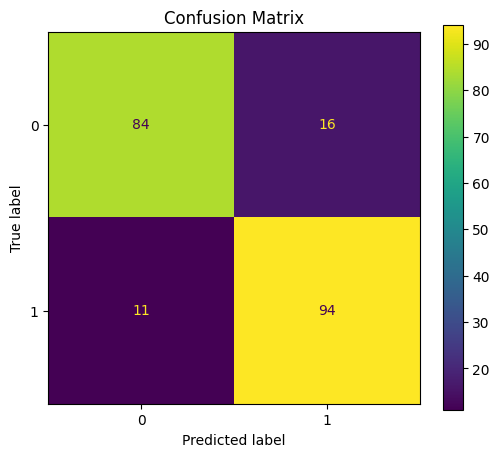

In [12]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(6,5))
disp.plot(ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

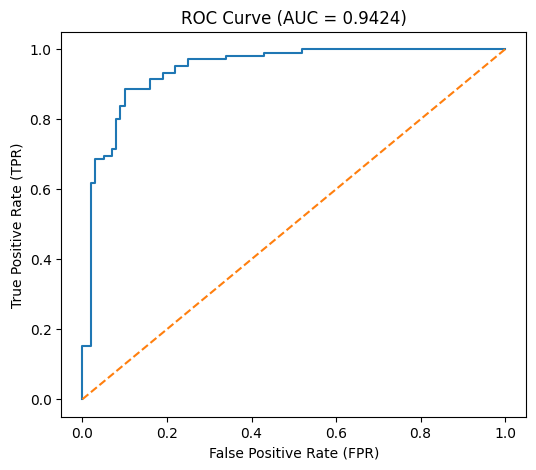

In [13]:
# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)

fig, ax = plt.subplots(figsize=(6,5))
ax.plot(fpr, tpr)
ax.plot([0,1],[0,1], linestyle='--')
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title(f'ROC Curve (AUC = {auc_score:.4f})')
plt.show()

In [14]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       100
           1       0.85      0.90      0.87       105

    accuracy                           0.87       205
   macro avg       0.87      0.87      0.87       205
weighted avg       0.87      0.87      0.87       205



In [15]:
# Map coefficients to feature names
coeffs = pd.Series(model.coef_[0], index=X_train.columns)
coeffs_sorted = coeffs.sort_values(key=abs, ascending=False)
display(coeffs_sorted.head(20))  # top 20 influential features (by absolute coefficient)

chest_pain_type_Typical angina        -1.601378
vessels_colored_by_flourosopy_Two     -1.490685
sex_Male                              -1.382595
vessels_colored_by_flourosopy_Zero     1.367177
thalassemia_Reversable Defect         -1.240476
slope_Flat                            -1.024394
rest_ecg_ST-T wave abnormality         1.017484
exercise_induced_angina_Yes           -0.778417
thalassemia_No                        -0.745409
rest_ecg_Normal                        0.722445
chest_pain_type_Atypical angina       -0.614171
vessels_colored_by_flourosopy_One     -0.568774
oldpeak                               -0.484765
vessels_colored_by_flourosopy_Three   -0.470602
slope_Upsloping                       -0.452206
chest_pain_type_Non-anginal pain       0.403859
resting_blood_pressure                -0.358541
Max_heart_rate                         0.352883
cholestoral                           -0.257255
age                                    0.134769
dtype: float64

In [17]:
try:
    acc_val = round(acc,4)
    prec_val = round(prec,4)
    rec_val = round(rec,4)
    f1_val = round(f1,4)
    auc_val = round(auc_score,4)
except NameError:
    acc_val = prec_val = rec_val = f1_val = auc_val = 'N/A'

writeup = (
    'Short analysis & conclusion:\n\n'
    f'The Logistic Regression model achieved an accuracy of {acc_val}, precision of {prec_val}, recall of {rec_val}, '
    f'F1-score of {f1_val}, and ROC AUC of {auc_val} on the test set.\n\n'
    'These results indicate how well the model discriminates between patients with and without heart disease. '
    'In medical settings, recall (sensitivity) is often prioritized to reduce false negatives. \n\n'
    'Logistic Regression is a good baseline due to its interpretability and probabilistic output. If performance is insufficient, '
    'consider tree-based ensembles (Random Forest, XGBoost) or SVMs, along with feature engineering, cross-validation, and hyperparameter tuning.\n\n'
    'Recommendation: treat this as a baseline and iterate with stronger models and robust validation if needed.'
)

print(writeup)

Short analysis & conclusion:

The Logistic Regression model achieved an accuracy of 0.8683, precision of 0.8545, recall of 0.8952, F1-score of 0.8744, and ROC AUC of 0.9424 on the test set.

These results indicate how well the model discriminates between patients with and without heart disease. In medical settings, recall (sensitivity) is often prioritized to reduce false negatives. 

Logistic Regression is a good baseline due to its interpretability and probabilistic output. If performance is insufficient, consider tree-based ensembles (Random Forest, XGBoost) or SVMs, along with feature engineering, cross-validation, and hyperparameter tuning.

Recommendation: treat this as a baseline and iterate with stronger models and robust validation if needed.
